In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('laptop_prices.csv')

# Basic info
print("Dataset Structure:")
print(df.info())
print("\nSample Data:")
print(df.head())
print("\nData Types:")
print(df.dtypes)
print("\nNumber of Rows and Columns:")
print(df.shape)


Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CP

In [2]:
# Missing values analysis
print("Missing Values Per Column:")
print(df.isnull().sum())

# Unique values per column
print("\nUnique Values Per Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Missing Values Per Column:
Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

Unique Values Per Column:
Company: 19
Product: 618
TypeName: 6
Inches: 18
Ram: 9
OS: 9
Weight: 171
Price_euros: 791
Screen: 4
ScreenW: 13
ScreenH: 10
Touchscreen: 2
IPSpanel: 2
RetinaDisplay: 2
CPU_company: 3
CPU_freq: 25
CPU_model: 93
PrimaryStorage: 13
SecondaryStorage: 6
PrimaryStorageType: 4
SecondaryStorageType: 4
GPU_company: 4
GPU_model: 110


In [3]:
# Descriptive statistics for numeric columns
print("Descriptive Statistics (Numeric):")
print(df.describe())

# Descriptive statistics for categorical columns
print("\nDescriptive Statistics (Categorical):")
print(df.describe(include='object'))


Descriptive Statistics (Numeric):
            Inches          Ram       Weight  Price_euros      ScreenW  \
count  1275.000000  1275.000000  1275.000000  1275.000000  1275.000000   
mean     15.022902     8.440784     2.040525  1134.969059  1900.043922   
std       1.429470     5.097809     0.669196   700.752504   493.346186   
min      10.100000     2.000000     0.690000   174.000000  1366.000000   
25%      14.000000     4.000000     1.500000   609.000000  1920.000000   
50%      15.600000     8.000000     2.040000   989.000000  1920.000000   
75%      15.600000     8.000000     2.310000  1496.500000  1920.000000   
max      18.400000    64.000000     4.700000  6099.000000  3840.000000   

           ScreenH     CPU_freq  PrimaryStorage  SecondaryStorage  
count  1275.000000  1275.000000     1275.000000       1275.000000  
mean   1073.904314     2.302980      444.517647        176.069020  
std     283.883940     0.503846      365.537726        415.960655  
min     768.000000     0.90

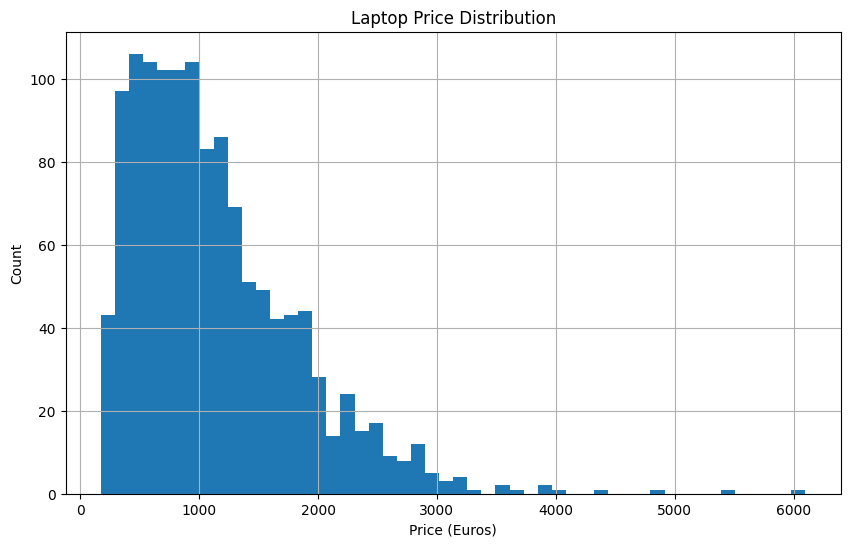

Top 5 Most Expensive Laptops:
     Company       Product  Price_euros
196    Razer     Blade Pro       6099.0
830    Razer     Blade Pro       5499.0
610   Lenovo  Thinkpad P51       4899.0
749       HP      Zbook 17       4389.0
1066    Asus    ROG G701VO       3975.0

Top 5 Least Expensive Laptops:
     Company                               Product  Price_euros
1215    Acer      C740-C9QX (3205U/2GB/32GB/Chrome        174.0
20      Asus                       Vivobook E200HA        191.9
1120    Vero      V131 (X5-Z8350/4GB/32GB/FHD/W10)        196.0
31      Asus  E402WA-GA010T (E2-6110/2GB/32GB/W10)        199.0
290     Acer                  Chromebook C910-C2ST        199.0


In [4]:
import matplotlib.pyplot as plt

# Plot price distribution
plt.figure(figsize=(10,6))
df['Price_euros'].hist(bins=50)
plt.title('Laptop Price Distribution')
plt.xlabel('Price (Euros)')
plt.ylabel('Count')
plt.show()

# Outlier detection in prices
print("Top 5 Most Expensive Laptops:")
print(df.nlargest(5, 'Price_euros')[['Company', 'Product', 'Price_euros']])
print("\nTop 5 Least Expensive Laptops:")
print(df.nsmallest(5, 'Price_euros')[['Company', 'Product', 'Price_euros']])


Average Price by Company:
Company
Razer        3346.142857
LG           2099.000000
MSI          1728.908148
Google       1677.666667
Microsoft    1612.308333
Apple        1564.198571
Huawei       1424.000000
Samsung      1413.444444
Toshiba      1267.812500
Dell         1199.225120
Xiaomi       1133.462500
Asus         1123.829737
Lenovo       1093.862215
HP           1080.314664
Fujitsu       729.000000
Acer          633.464455
Chuwi         314.296667
Mediacom      295.000000
Vero          217.425000
Name: Price_euros, dtype: float64


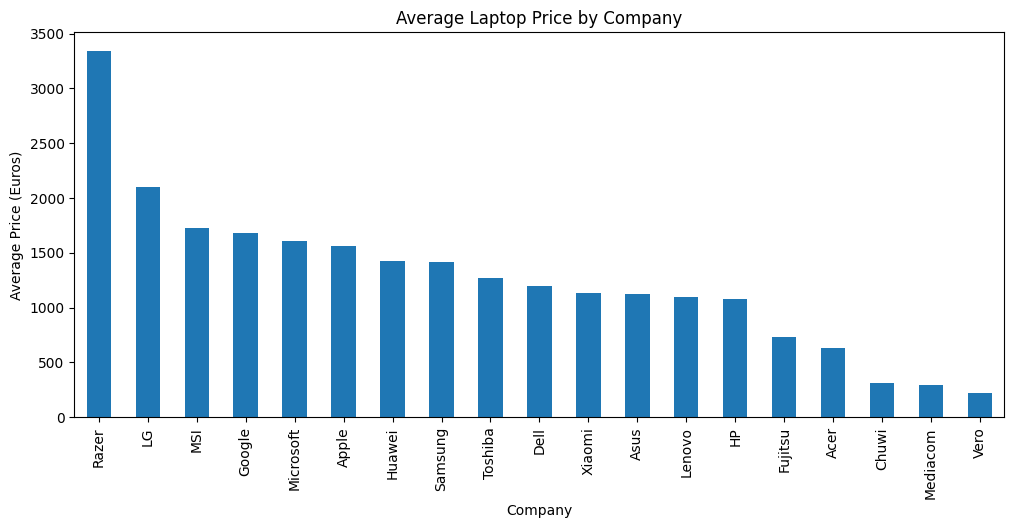

In [5]:
# Average price by company
company_avg = df.groupby('Company')['Price_euros'].mean().sort_values(ascending=False)
print("Average Price by Company:")
print(company_avg)
company_avg.plot(kind='bar', figsize=(12, 5), title='Average Laptop Price by Company')
plt.ylabel('Average Price (Euros)')
plt.show()


Average Price by Laptop Type:
TypeName
Workstation           2280.358966
Gaming                1731.380634
Ultrabook             1556.676031
2 in 1 Convertible    1289.714530
Notebook               788.744781
Netbook                673.382609
Name: Price_euros, dtype: float64


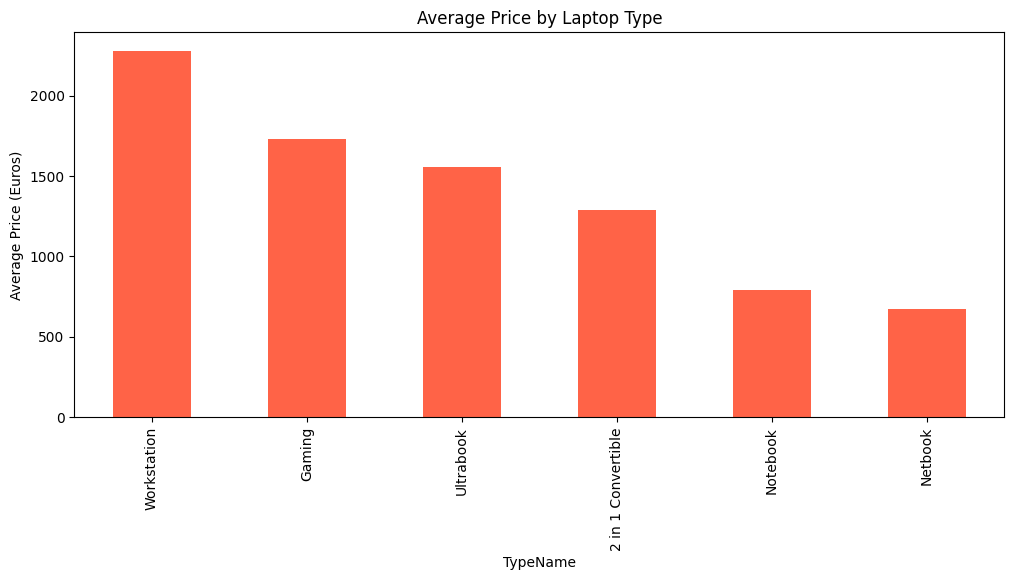

In [9]:
type_avg = df.groupby('TypeName')['Price_euros'].mean().sort_values(ascending=False)
print("Average Price by Laptop Type:")
print(type_avg)
type_avg.plot(kind='bar', color='tomato', figsize=(12, 5), title='Average Price by Laptop Type')
plt.ylabel('Average Price (Euros)')
plt.show()


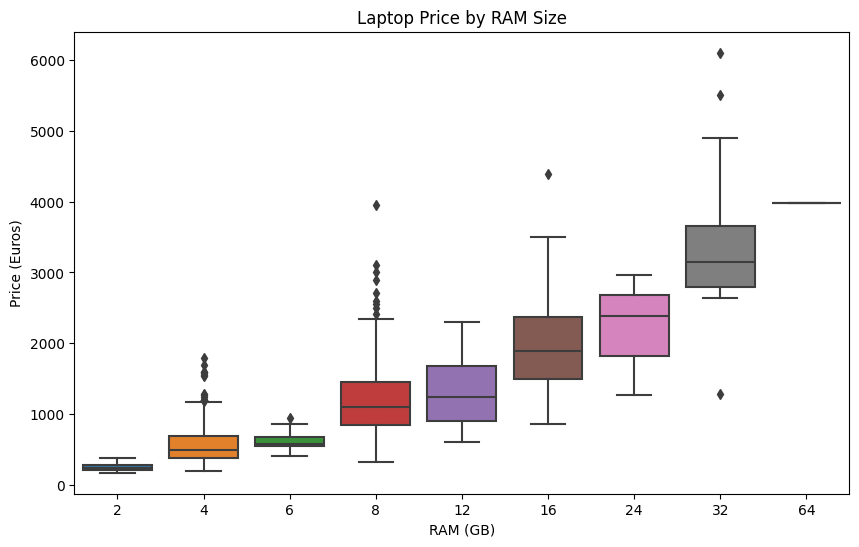

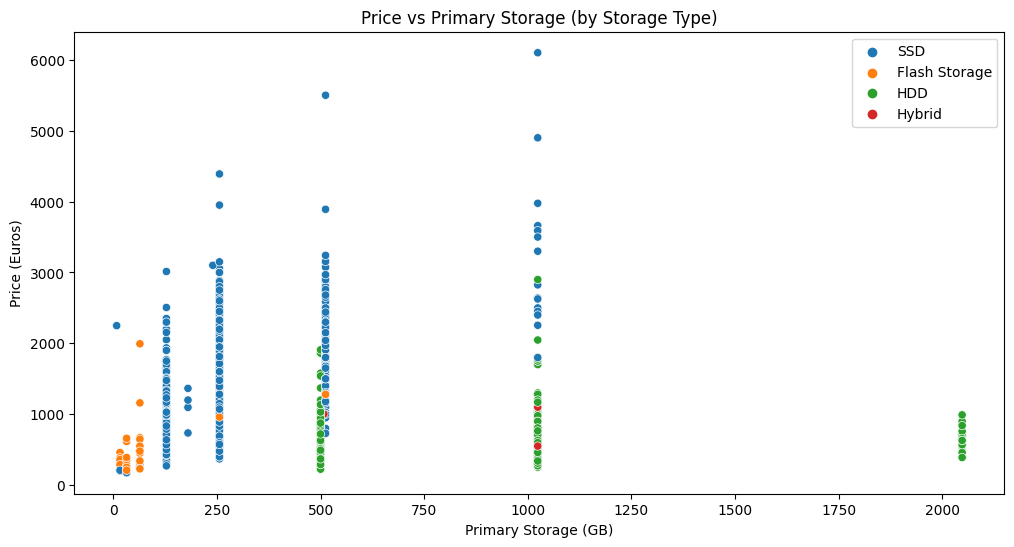

In [6]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='Ram', y='Price_euros', data=df)
plt.title('Laptop Price by RAM Size')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euros)')
plt.show()

plt.figure(figsize=(12,6))
sns.scatterplot(x='PrimaryStorage', y='Price_euros', data=df, hue='PrimaryStorageType')
plt.title('Price vs Primary Storage (by Storage Type)')
plt.xlabel('Primary Storage (GB)')
plt.ylabel('Price (Euros)')
plt.legend()
plt.show()


In [7]:
os_price = df.groupby('OS')['Price_euros'].mean().sort_values(ascending=False)
print("Average Price by Operating System:")
print(os_price)

gpu_price = df.groupby('GPU_company')['Price_euros'].mean().sort_values(ascending=False)
print("\nAverage Price by GPU Company:")
print(gpu_price)


Average Price by Operating System:
OS
macOS           1749.630769
Windows 7       1686.651333
Windows 10 S    1286.480000
Mac OS X        1262.871250
Windows 10      1180.684065
Linux            621.867069
No OS            587.973333
Chrome OS        553.585185
Android          434.000000
Name: Price_euros, dtype: float64

Average Price by GPU Company:
GPU_company
Nvidia    1496.745101
Intel     1020.367713
AMD        778.026552
ARM        659.000000
Name: Price_euros, dtype: float64


Correlation Matrix:
                    Inches       Ram    Weight  Price_euros   ScreenW  \
Inches            1.000000  0.241078  0.826638     0.066608 -0.068223   
Ram               0.241078  1.000000  0.389370     0.740287  0.424089   
Weight            0.826638  0.389370  1.000000     0.211883 -0.028605   
Price_euros       0.066608  0.740287  0.211883     1.000000  0.552491   
ScreenW          -0.068223  0.424089 -0.028605     0.552491  1.000000   
ScreenH          -0.093062  0.415241 -0.050106     0.548529  0.994069   
CPU_freq          0.305037  0.366254  0.318649     0.428847  0.178659   
PrimaryStorage    0.264280  0.015365  0.175433    -0.124775 -0.072977   
SecondaryStorage  0.389067  0.390939  0.481495     0.291207  0.146232   

                   ScreenH  CPU_freq  PrimaryStorage  SecondaryStorage  
Inches           -0.093062  0.305037        0.264280          0.389067  
Ram               0.415241  0.366254        0.015365          0.390939  
Weight           -0.050106  0.

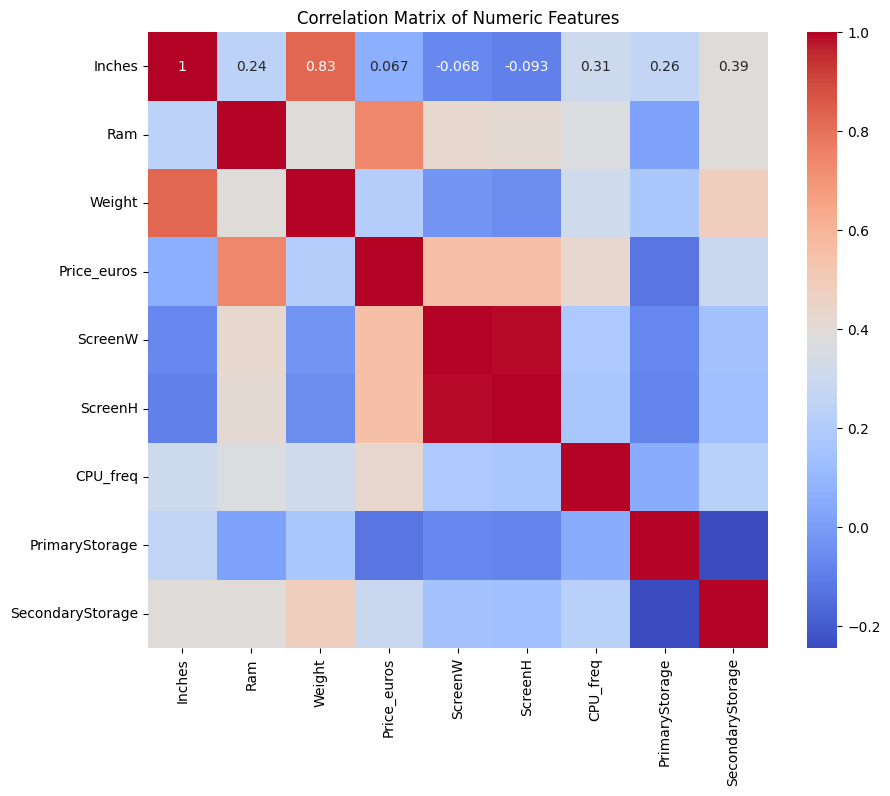

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print correlation matrix for numeric columns only
print("Correlation Matrix:")
print(df.corr(numeric_only=True))

# Heatmap visualization of correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()
